In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', 1500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
##importing datasets
churn=pd.read_csv('churn_data.csv')
internet=pd.read_csv('internet_data.csv')
customer=pd.read_csv('customer_data.csv')

In [4]:
##checking the datarames
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
##merging all the dataframes together as we need them in one dataframe to analyse the complete picture
df_1=pd.merge(internet, customer, how='inner', on='customerID')

In [8]:
telecom=pd.merge(df_1,churn,how='inner',on='customerID')

# Dataframe Inspection

In [9]:
## we  have got the master dataframe
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
##checking shape
telecom.shape

(7043, 21)

In [11]:
##checking numerical description
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
##chcking datatypes
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     7043 non-null   object 
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
##Converting some variables to zero and 1

varlist=['Churn','PaperlessBilling','PhoneService','Dependents','Partner']

def bi_map(x):
    return x.map({'Yes':1,'No':0})
    
telecom[varlist]=telecom[varlist].apply(bi_map)

In [14]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     7043 non-null   object 
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [16]:
##Converting total charges to float datatype
telecom['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [19]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [20]:
telecom['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [21]:
telecom['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [22]:
telecom['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [23]:
telecom['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [24]:
telecom['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [25]:
telecom['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

## Observation:

- Here we  have dropped manually few dummy columns, the reason for the same is there is an internet service col which has a category as no internet service being indicated as zero.

- This eventually means that all other columns which has 'no internet service' is representing one of the same thing and hence we would go ahead and drop the dummy columns labelled above

In [26]:
###Dropping reduntant columns
cols_drop=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
           'StreamingMovies','gender','Contract','PaymentMethod']
telecom.drop(cols_drop, 1, inplace=True)

In [27]:
telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [28]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [29]:
##checking the null values
telecom.isnull().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [30]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [31]:
##Dropping some null enteries from the total charge col as they are  less in numbers.
telecom=telecom[~(telecom['TotalCharges']==' ')]

In [32]:
#changing the datatype
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'])

In [33]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [34]:
##Droppig customer id
telecom.drop('customerID',1,inplace=True)

### Now it seems that all the attributes has the correct data type, so we can check for outliers in the data if any

In [35]:
telecom.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [36]:
##checking for outliers with the numerical cols and plotting them in box plot.
num_list=['MonthlyCharges','TotalCharges','tenure']
telecom[num_list].describe(percentiles=(0.25,0.50,0.75,0.90,0.95,0.99))

,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,32.421786
std,30.085974,2266.771362,24.545260
min,18.250000,18.800000,1.000000
25%,35.587500,401.450000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.862500,3794.737500,55.000000
90%,102.645000,5976.640000,69.000000
95%,107.422500,6923.590000,72.000000
99%,114.734500,8039.883000,72.000000


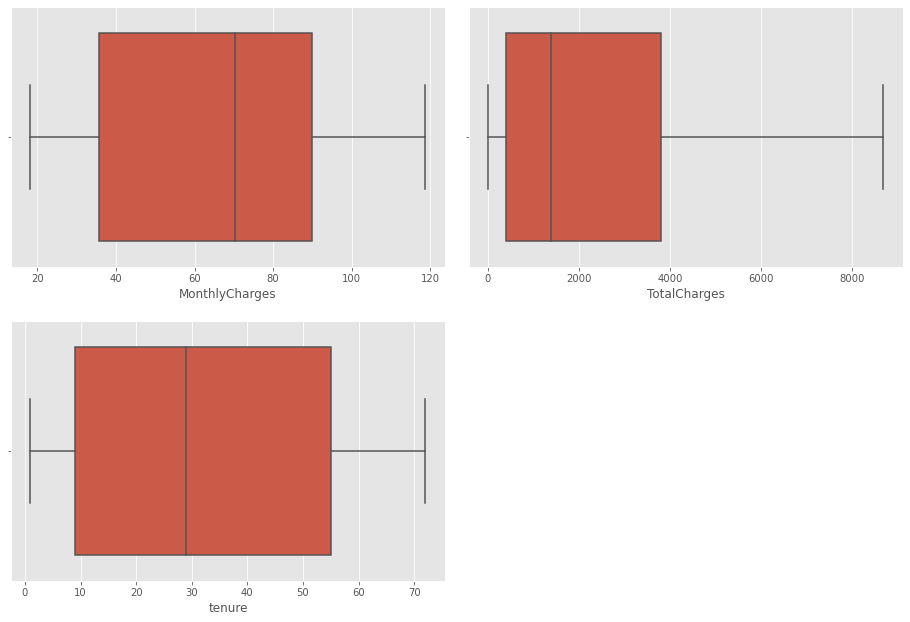

In [37]:
##Plotting the box plot
plt.style.use('ggplot')
plt.figure(figsize=[13,9])
plt.subplot(2,2,1)
sns.boxplot(telecom['MonthlyCharges'])

plt.subplot(2,2,2)
sns.boxplot(telecom['TotalCharges'])

plt.subplot(2,2,3)
sns.boxplot(telecom['tenure'])

plt.tight_layout(pad=2.0)

plt.show()

## Observation:

-  No significant outliers in the data

## Splitting the data set into test and train split.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
##splitting the data
df_train, df_test=train_test_split(telecom, train_size=0.7,random_state=100)

In [40]:
##print the dimen
print(df_train.shape)
print(df_test.shape)

(4922, 31)
(2110, 31)


In [41]:
##importing necessary libraries
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Scaling

In [42]:
##creating the object of the class StandardScaler
scaler=StandardScaler()

In [43]:
##using train data set and keeping aside the test data set
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,33,1,1,54.65,1665.20,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,40,0,1,50.85,2036.55,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,1,1,1,82.30,82.30,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,0,0,0,10,1,1,110.10,1043.30,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,4,1,1,98.10,396.30,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [44]:
##scaling the values
scale_list=['MonthlyCharges','TotalCharges','tenure']
df_train[scale_list]=scaler.fit_transform(df_train[scale_list])
df_test[scale_list]=scaler.transform(df_test[scale_list])

In [45]:
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [46]:
#Seperating X_train and y_train
y_train=df_train.pop('Churn')
X_train=df_train

In [47]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [48]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [49]:
##checking for class imbalance
((sum(telecom['Churn'])/len(telecom['Churn']))*100)

26.578498293515356

- The % of customers leaving the network is 27% as compared to staying in the same network
- This is not a very high class imbalance, if this would have been say 5% then we would have applied few technques to resolve the same.

In [50]:
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


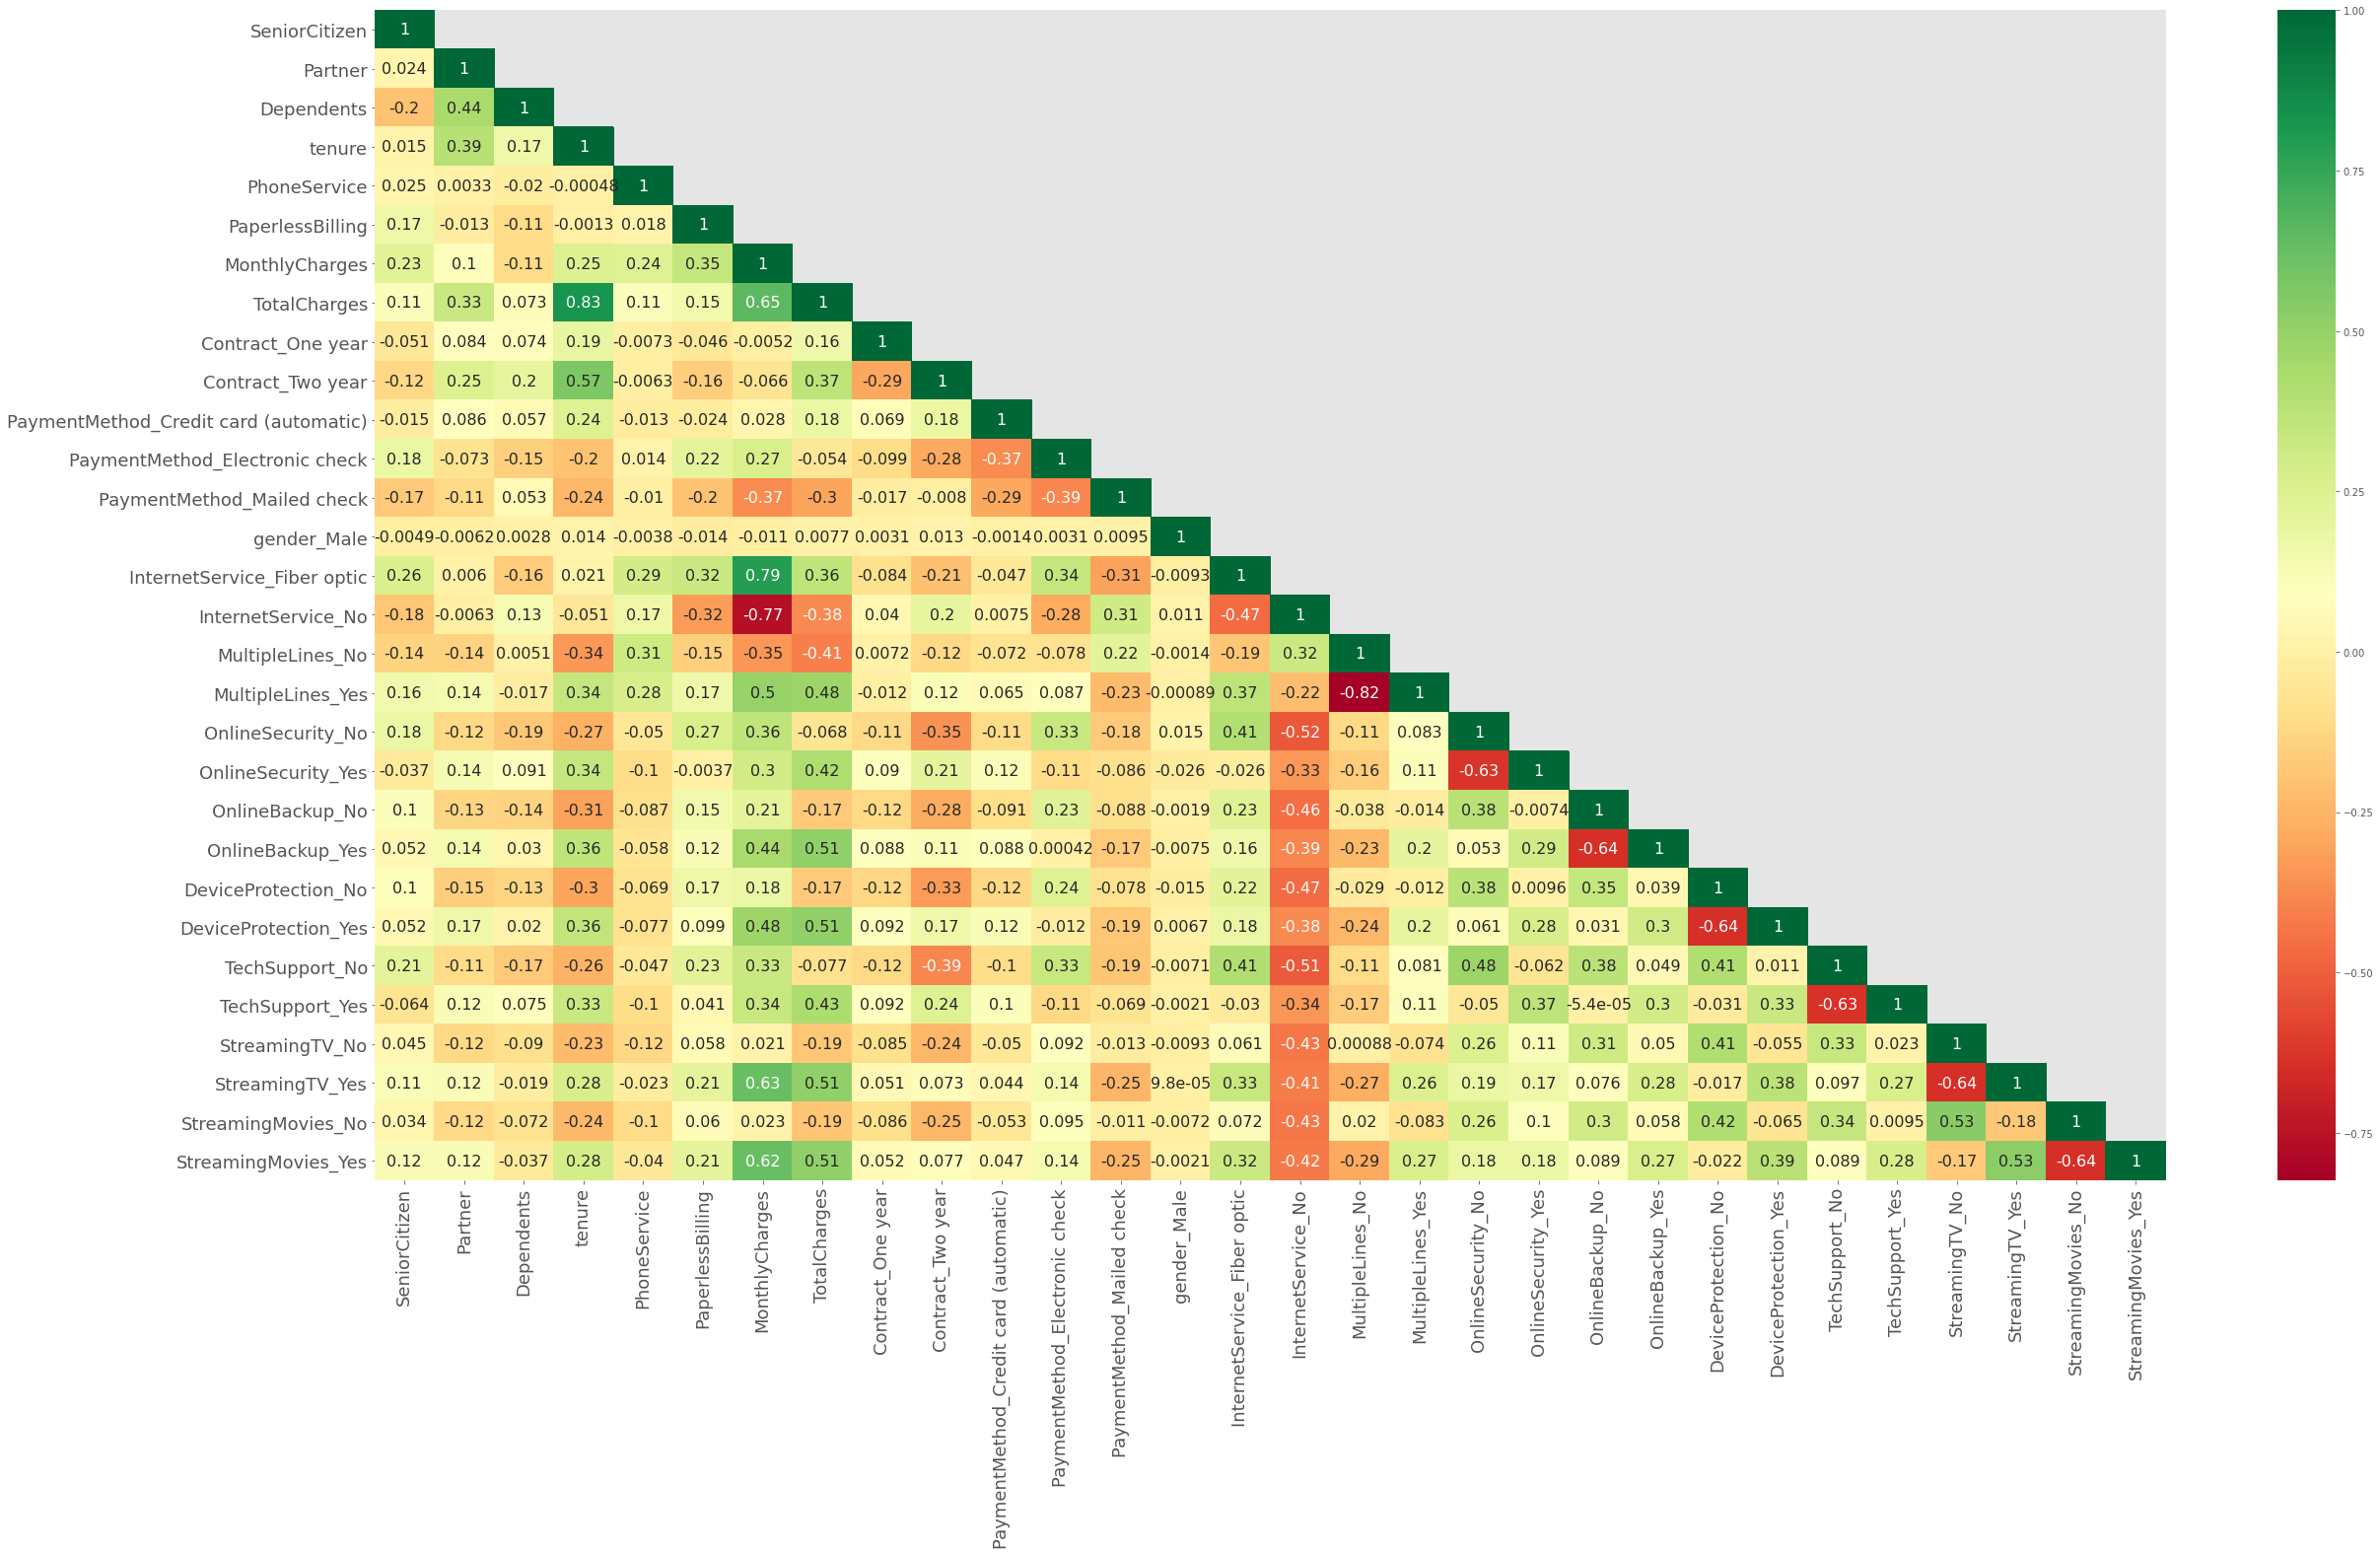

In [51]:
##Checking the correlation matrix
plt.figure(figsize=[35,20])
cor=df_train.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cor, mask=mask, annot=True, cmap='RdYlGn',annot_kws={'size': 16})
plt.tight_layout(pad=2.0)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

## Observation:

- From the above correlation matrix, we are able to see few variables which are pretty much correlated with other variables.

- The best would be to drop those here such that we would  not encounter multicollinearity in our model.

- Later in the process of model building we can focus on which one to keep and which  one to drop.

In [52]:
##Dropping some varibles which shows multicollnearity
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

In [53]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'], dtype='object')

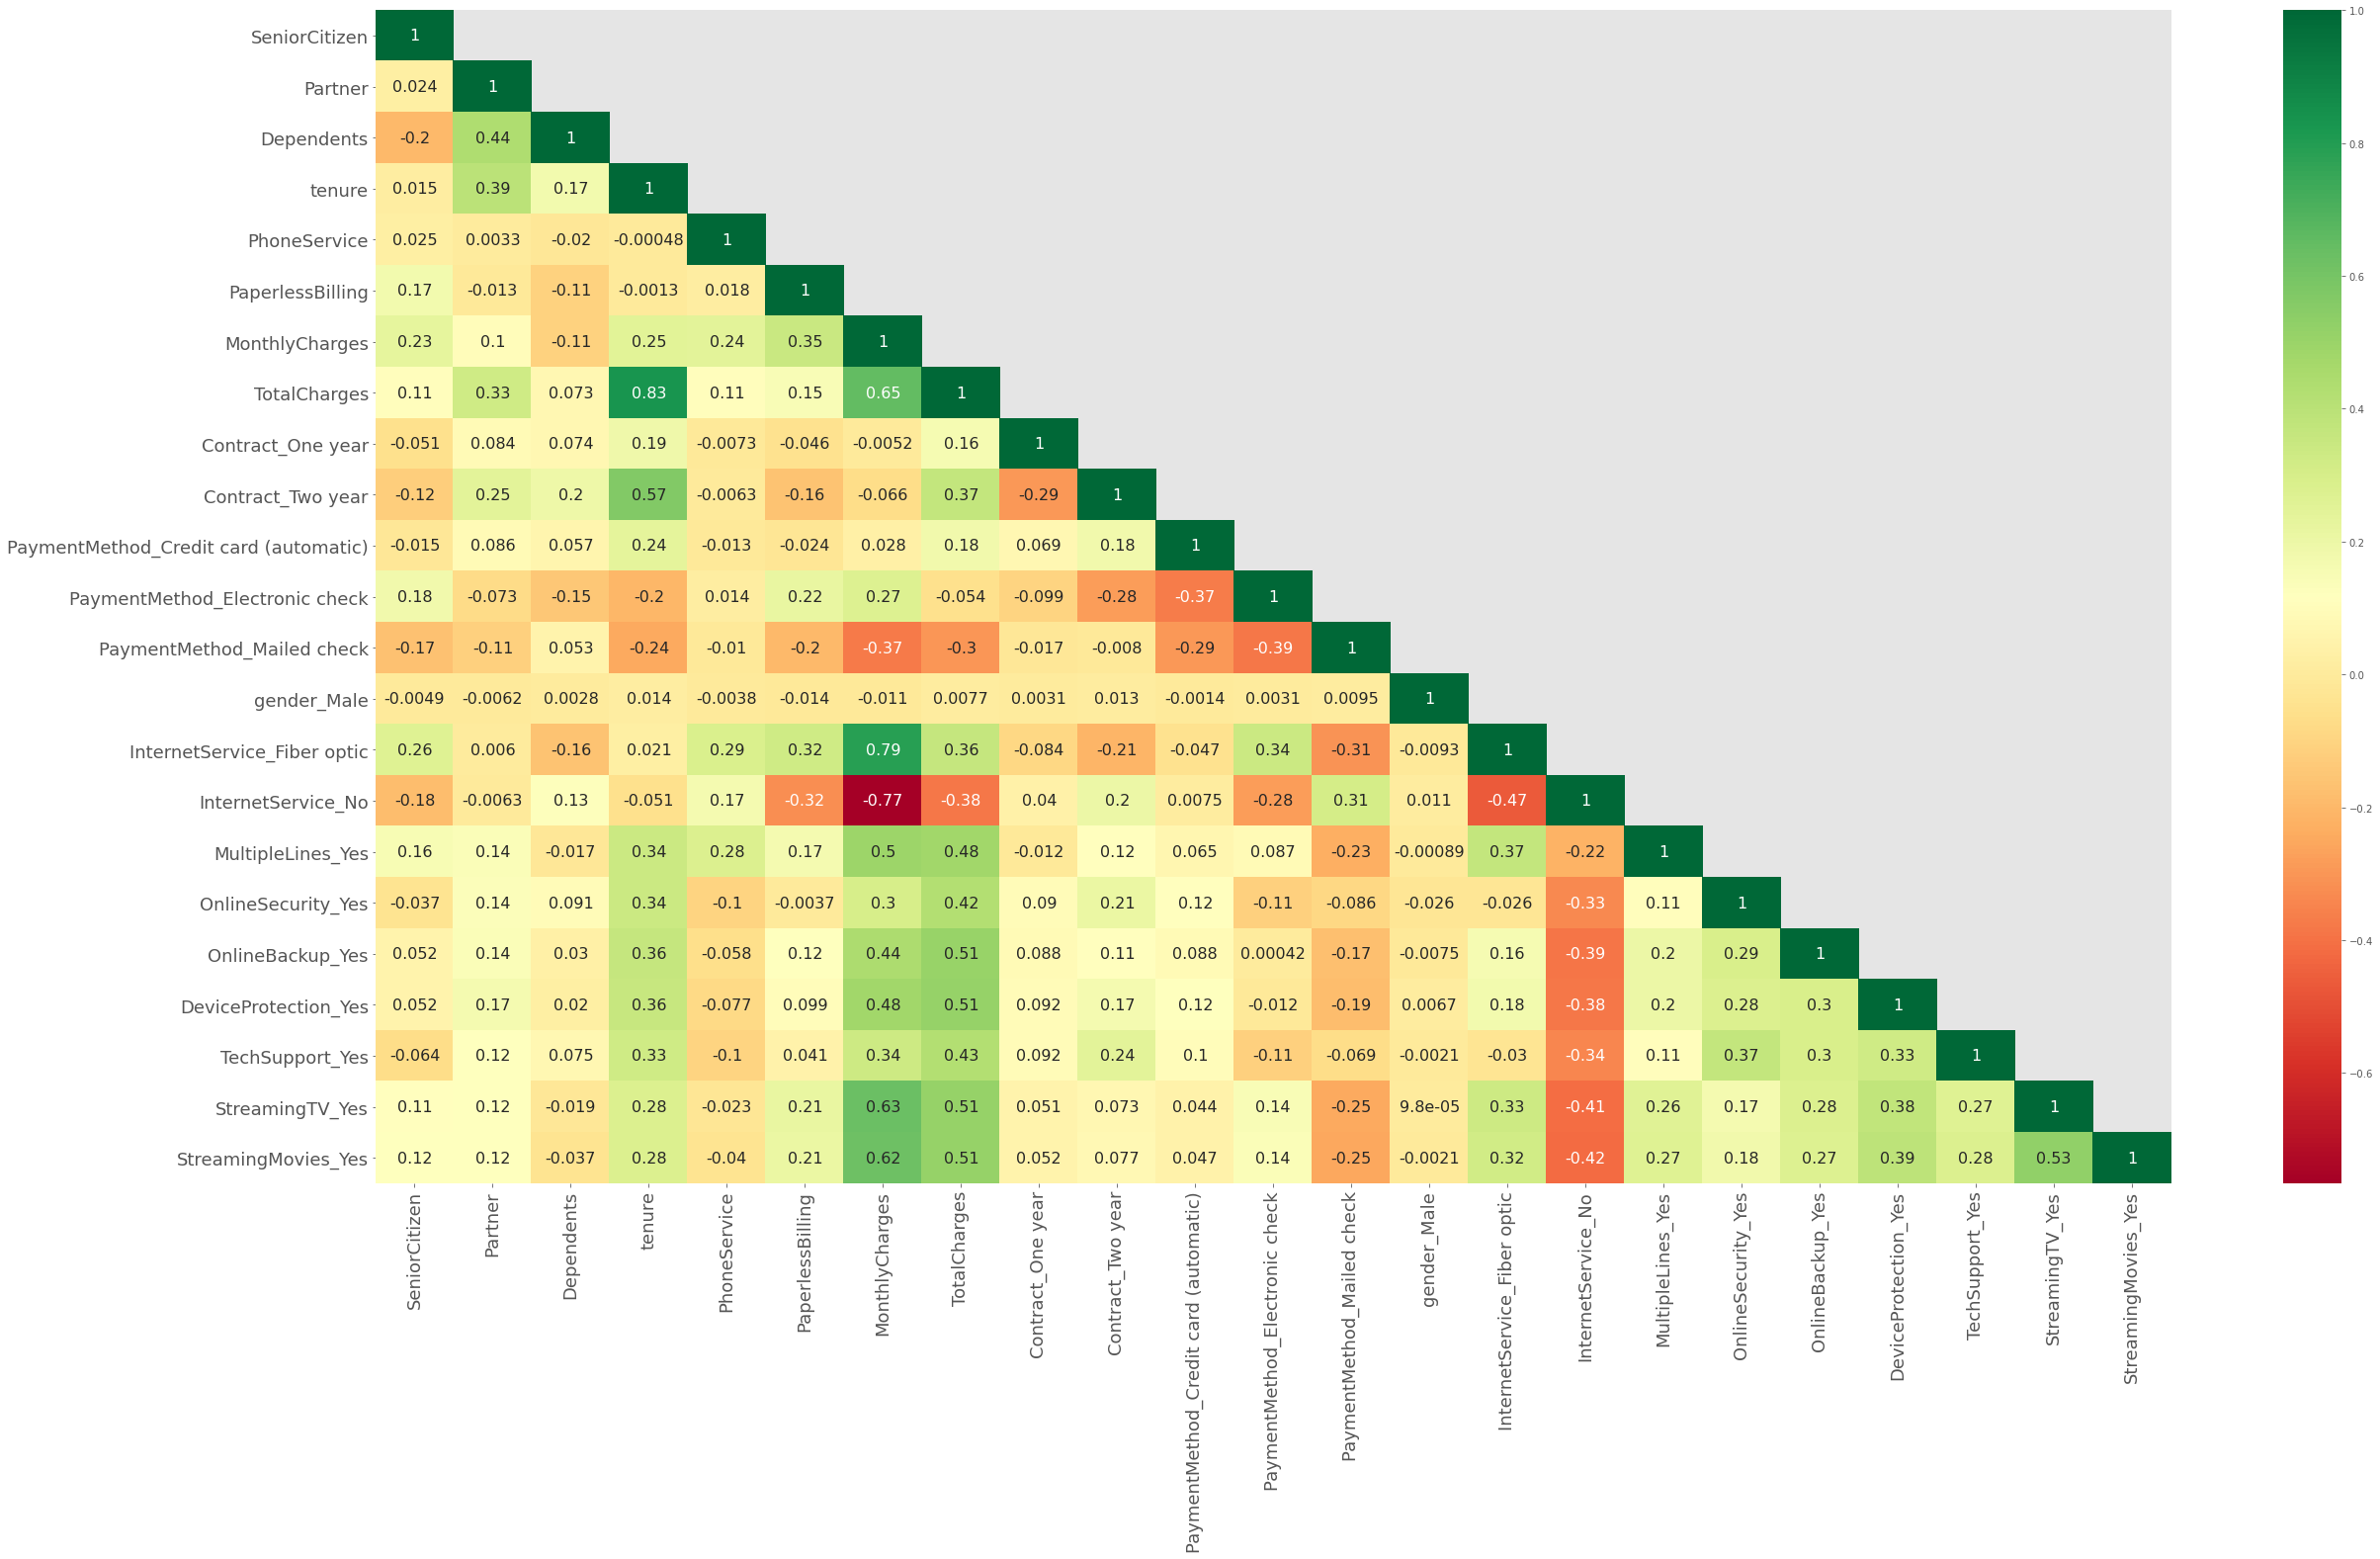

In [54]:
##checking the correlation matrix again
plt.figure(figsize=[35,20])
cor=X_train.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cor, mask=mask, annot=True, cmap='RdYlGn',annot_kws={'size': 16})
plt.tight_layout(pad=2.0)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

### Building first model for logistic regression using statsmodel

In [55]:
##Building the first model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 12 Aug 2021   Deviance:                       4009.4
Time:                        11:56:13   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
##selecting 15 features
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [59]:
##Checking the selected features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [60]:
##Cols selected by RFE
col=X_train.columns[rfe.support_]

In [61]:
print(col)

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'], dtype='object')


In [62]:
##No of  cols not selected by RFEE
col_not=X_train.columns[~rfe.support_]
print(col_not) 

Index(['Partner', 'Dependents', 'PhoneService', 'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes'], dtype='object')


### Assessing the model with the selected columns

In [63]:
X_train_sm1=sm.add_constant(X_train[col])
logreg1=sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial())
log_model=logreg1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 12 Aug 2021   Deviance:                       4022.2
Time:                        11:56:17   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [64]:
# Getting the predicted values on the train set
y_train_pred=log_model.predict(X_train_sm1)
y_train_pred.head(10)

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [65]:
##reshaping the pred values to a 1d array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [66]:
##putting all these data to a dataframe
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_train_pred_final['CustId']=y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustId
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


- Here the bar is set at 0.5. If the probability is above 0.5, then Churn is marked as yes and if less than 0.5,then it is marked as 0.

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [67]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [68]:
y_train_pred_final.head()

,Churn,Churn_prob,CustId,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [69]:
##Assessing the model
from sklearn import metrics

In [70]:
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['predicted'])
print(confusion)

[[3275  360]
 [ 574  713]]


In [71]:
cm=pd.DataFrame(confusion)
cm

,0,1
0,3275,360
1,574,713


In [72]:
cm.index = ['Actual Not_Churn','Actual Churn']
cm.columns = ['Predicted Not_Churn', 'Predicted Churn']

In [73]:
cm

,Predicted Not_Churn,Predicted Churn
Actual Not_Churn,3275,360
Actual Churn,574,713


### Interpretation of Confusion Matrix:

- On the Index we have the actual values and on the columns we have the predicted values.

- In the first scenario, the actual not churn is 3275 and the model was able to classify 3275 as not churn  hence True Negative

- In the second scenario, Actual Not Churn was 360, however the model misclassified them as churn. So this indicates a False Positive

- In the third scenario, actual churn was 574, but the model misclassified those points as not churn and hence being predicted as no churn.So, this indicates False Negative.

- In the last scenario, the actuual churn is 713 and the model predicts those as churned customers and hence it is called as True Positive.

- So, on the basis of the above values  and from business persective it is crucial to understand that the customers classified as churn should be predicted as churn so that a company gets the clear idea of how things are. Hence we would focus on to minimise the False Negative which is a Type 2 error.

In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['predicted']))

0.8102397399431126


##### Checking VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
##Checking the VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,14.85
4,TotalCharges,10.42
1,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
2,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


#### Dropping Monthly charges as VIF for the same is on the higher side.

In [77]:
col=col.drop('MonthlyCharges')

In [78]:
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'], dtype='object')

In [79]:
##Rebuilding the same model and checking accurancy.
X_train_sm2=sm.add_constant(X_train[col])
logreg2=sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())
log_model2=logreg2.fit()
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Thu, 12 Aug 2021   Deviance:                       4046.2
Time:                        11:56:19   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [80]:
# Getting the predicted values on the train set
y_train_pred1=log_model2.predict(X_train_sm2)
y_train_pred1.head(10)

879     0.227902
5790    0.228644
6498    0.674892
880     0.615868
2784    0.662260
3874    0.418199
5387    0.288133
6623    0.795137
4465    0.174332
5364    0.519088
dtype: float64

In [81]:
##reshaping the pred values to a 1d array
y_train_pred1= y_train_pred1.values.reshape(-1)
y_train_pred1[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [82]:
##putting all these data to a dataframe
y_train_pred_final1=pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred1})
y_train_pred_final1['CustId']=y_train.index
y_train_pred_final1['predicted']=y_train_pred_final1['Churn_prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final1.head()

,Churn,Churn_prob,CustId,predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [83]:
##Assessing the model
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final1['Churn'], y_train_pred_final1['predicted'])
cm=pd.DataFrame(confusion)
cm.index = ['Actual Not_Churn','Actual Churn']
cm.columns = ['Predicted Not_Churn','Predicted Churn']
cm

,Predicted Not_Churn,Predicted Churn
Actual Not_Churn,3269,366
Actual Churn,590,697


In [84]:
##Checking the VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalCharges,7.46
1,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
2,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [85]:
# Let's check the overall accuracy.
print('Model Score is :', metrics.accuracy_score(y_train_pred_final1['Churn'], y_train_pred_final1['predicted']))

Model Score is : 0.8057700121901666


In [86]:
##Droppign MultipleLines_Yes.

col=col.drop('TotalCharges')

In [87]:
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'], dtype='object')

In [88]:
##Rebuilding the same model and checking accurancy.
X_train_sm3=sm.add_constant(X_train[col])
logreg3=sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial())
log_model3=logreg3.fit()
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Thu, 12 Aug 2021   Deviance:                       4051.9
Time:                        11:56:20   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [89]:
##Checking the VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
2,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
1,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [169]:
# Getting the predicted values on the train set
y_train_pred2=log_model3.predict(X_train_sm3)
y_train_pred2.head(10)

879     0.245817
5790    0.265361
6498    0.669410
880     0.630970
2784    0.682916
3874    0.399526
5387    0.275828
6623    0.798168
4465    0.198786
5364    0.529119
dtype: float64

In [171]:
y_train_pred2.values.reshape(-1)

array([0.24581699, 0.26536078, 0.66940978, ..., 0.0631844 , 0.10067183,
       0.04835675])

In [91]:
##reshaping the pred values to a 1d array
y_train_pred2= y_train_pred2.values.reshape(-1)
y_train_pred2[:10]

##putting all these data to a dataframe
y_train_pred_final2=pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred2})
y_train_pred_final2['CustId']=y_train.index
y_train_pred_final2['predicted']=y_train_pred_final2['Churn_prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final2.head()

,Churn,Churn_prob,CustId,predicted
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [92]:
# Let's check the overall accuracy.
print('Model Score is :', metrics.accuracy_score(y_train_pred_final2['Churn'], y_train_pred_final2['predicted']))

Model Score is : 0.8061763510767981


In [93]:
confusion = metrics.confusion_matrix(y_train_pred_final2['Churn'], y_train_pred_final2['predicted'])
cm=pd.DataFrame(confusion)
cm.index = ['Actual Not_Churn','Actual Churn']
cm.columns = ['Predicted Not_Churn','Predicted Churn']
cm

,Predicted Not_Churn,Predicted Churn
Actual Not_Churn,3278,357
Actual Churn,597,690


## Metrics beyond simply accuracy

In [94]:
##Getting the components from the confusion matrix
True_neg=cm.iloc[:,0][0]
False_pos=cm.iloc[:,1][0]
False_neg=cm.iloc[:,0][1]
True_pos=cm.iloc[:,1][1]

In [95]:
###Sensitivity
Sensitivity=(True_pos)/(False_neg+True_pos)
print(Sensitivity)

0.5361305361305362


- It could be observed that from the above model score that the accurancy is around 80% but seeing at the sensitivity we got that at 53.613% which is very less than the accurancy.

- Here our objective is to maximise the % of True positive and get all the customers who are actually churning out should be predicted as churning out, such that we  can roll out offers for the other customers who are actually churning out but the predicted value is not churn

In [96]:
##Specificity
Specificity=(True_neg)/(True_neg+False_pos)
print(Specificity)

0.9017881705639614


In [97]:
1-Specificity

0.09821182943603857

In [98]:
##False Positive rate
FPR=(False_pos)/(True_neg+False_pos)
FPR

0.09821182943603851

In [99]:
##False Negative rate
FNR=(False_neg)/(False_neg+True_pos)
FNR

0.46386946386946387

In [100]:
##Positive predictive value
PPV=(True_pos)/(True_pos+False_pos)
PPV

0.6590257879656161

- This means 65% of the times we said positive(Actual value is 1)the predicted value was postive.

In [101]:
##Negative predictive value
NPV=(True_neg)/(False_neg+True_neg)
NPV

0.8459354838709677

- This means 85% of the times we said Negativ(Actual Value was zero) the predicted value is negative.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final2.Churn, y_train_pred_final2.Churn_prob, drop_intermediate = False )

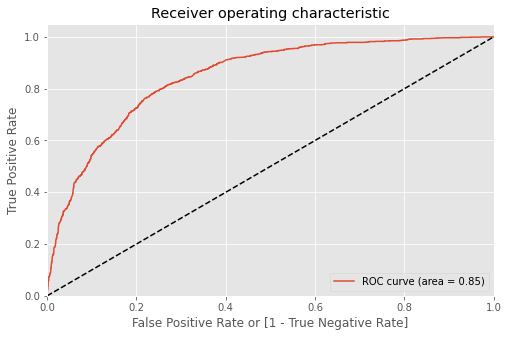

In [104]:
draw_roc(y_train_pred_final2.Churn, y_train_pred_final2.Churn_prob)

### FInding the optimal cutoff point

In [105]:
numbers=[float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final2[i]=y_train_pred_final2['Churn_prob'].apply(lambda x:1 if x>i else 0)
y_train_pred_final2.head()

,Churn,Churn_prob,CustId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [117]:
##Now for each probability values we would look for the values suh as spei, sensi and accuracy
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


for i in numbers:
    cm2 = metrics.confusion_matrix(y_train_pred_final2['Churn'], y_train_pred_final2[i])
    total=sum(sum(cm2))
    sensi=cm2[1,1]/(cm2[1,0]+cm2[1,1])
    speci=cm2[0,0]/(cm2[0,1]+cm2[0,0])
    accuracy=(cm2[0,0]+cm2[1,1])/total
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


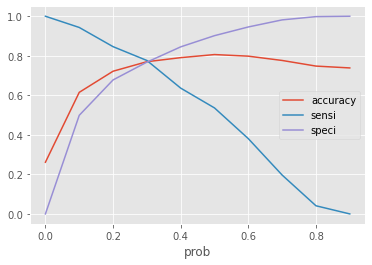

In [118]:
#Plotting the line plot to understand the optimal region

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

## Observation

- From the above plot, we could understand that when the prob is 0.0, sensitivity is 1 and specificity is 0.

- As the probability increases we see that the sensitivity decreases and specificity increases.

- Therefore we get an optimal point where we understand that all the three lines luckily conincide and hence we can state 0.3 is the optimal point where we could  finalise this as a cut off region and describe our model.

##### So we have identified the optimal point and that seems to be 0.3.

In [130]:
##Rebuilding the model and setting off the cut off point to 0.3.
y_train_pred_final_model=y_train_pred_final2.drop(['predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1)
y_train_pred_final_model['predicted_final']=y_train_pred_final_model['Churn_prob'].apply(lambda x:1 if x>0.3 else 0)
y_train_pred_final_model.head()

,Churn,Churn_prob,CustId,predicted_final
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [131]:
##Building a confusion matrix
conf_final=metrics.confusion_matrix(y_train_pred_final_model['Churn'],y_train_pred_final_model['predicted_final'])
conf_final=pd.DataFrame(conf_final)
conf_final.index=['Actual No Churn','Actual Churn']
conf_final.columns=['Preicted No Churn','Predicted Churn']
conf_final

,Preicted No Churn,Predicted Churn
Actual No Churn,2791,844
Actual Churn,288,999


##### Accuracy Score

In [155]:
metrics.accuracy_score(y_train_pred_final_model['Churn'],y_train_pred_final_model['predicted_final'])

0.7700121901665989

##### Precision

In [134]:
precision=conf_final.iloc[:,1][1]/(conf_final.iloc[:,1][0]+conf_final.iloc[:,1][1])
precision

0.5420510037981552

### Interpretation:
    
- Out of all the predicted yes that means churn we are able to predict 54% of them correctly

##### Recall

In [136]:
recall=conf_final.iloc[:,1][1]/(conf_final.iloc[:,1][1]+conf_final.iloc[:,0][1])
recall

0.7762237762237763

### Interpretation:
    
- Out of all the actual yes'es that means churn we are able to predict 77% of them correctly

##### Finding precision and recall using sklearn utils

In [138]:
from sklearn.metrics import precision_score, recall_score

In [139]:
precision_score(y_train_pred_final_model['Churn'],y_train_pred_final_model['predicted_final'])

0.5420510037981552

In [140]:
recall_score(y_train_pred_final_model['Churn'],y_train_pred_final_model['predicted_final'])

0.7762237762237763

In [141]:
from sklearn.metrics import precision_recall_curve

In [142]:
p,r,threshold=precision_recall_curve(y_train_pred_final_model['Churn'],y_train_pred_final_model['Churn_prob'])

In [144]:
print(p)

[0.26706786 0.26702658 0.26708204 ... 1.         1.         1.        ]


In [153]:
print(len(r))

3482


In [152]:
len(threshold)

3481

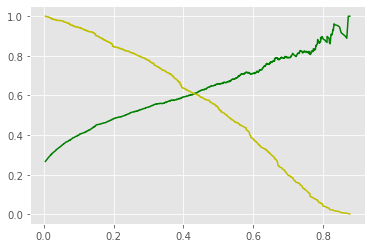

In [154]:
##plotting the curve
plt.plot(threshold, p[:-1],'g')
plt.plot(threshold, r[:-1],'y')

### Prediction on the test set

In [156]:
df_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
942,0,0,0,-0.347623,1,1,0.499951,-0.128378,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
3730,0,1,0,0.999203,1,1,1.319685,1.600302,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
1761,0,0,0,1.040015,1,1,-1.342374,-0.343297,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2283,0,0,0,-1.286319,1,1,0.223935,-0.979170,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1872,0,1,1,0.346196,1,0,-1.500335,-0.656086,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
###Final features
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'], dtype='object')

In [160]:
##Segregating the features from the dependent variable.
X_test=df_test[col]
y_test=df_test['Churn']

In [161]:
y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

In [162]:
##Making predictions
X_test_sm=sm.add_constant(X_test)
y_test_pred=log_model3.predict(X_test_sm)

In [163]:
y_test_pred.head()

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
dtype: float64

In [173]:
y_test_pred.reshape(-1)

array([0.4197249 , 0.26023229, 0.00864986, ..., 0.00834799, 0.50361892,
       0.00548729])

In [174]:
##reshaping the pred values to a 1d array
y_test_pred= y_test_pred.reshape(-1)

##putting all these data to a dataframe
y_test_pred_final=pd.DataFrame({'Churn':y_test.values,'Churn_prob':y_test_pred})
y_test_pred_final['CustId']=y_test.index
y_test_pred_final['predicted']=y_test_pred_final['Churn_prob'].apply(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

,Churn,Churn_prob,CustId,predicted
0,0,0.419725,942,1
1,1,0.260232,3730,0
2,0,0.008650,1761,0
3,1,0.592626,2283,1
4,0,0.013989,1872,0


In [175]:
print('Model Score is:', metrics.accuracy_score(y_test_pred_final['Churn'],y_test_pred_final['predicted']))

Model Score is: 0.7407582938388626


##### Building the confusion matrix

In [176]:
conf_test=metrics.confusion_matrix(y_test_pred_final['Churn'],y_test_pred_final['predicted'])
conf_test=pd.DataFrame(conf_test)
conf_test.index=['Actual Non Churn', 'Actual Churn']
conf_test.columns=['Predicted Non Churn','Predicted Churn']
conf_test

,Predicted Non Churn,Predicted Churn
Actual Non Churn,1144,384
Actual Churn,163,419


In [178]:
precision_score(y_test_pred_final['Churn'],y_test_pred_final['predicted'])

0.5217932752179327

In [179]:
recall_score(y_test_pred_final['Churn'],y_test_pred_final['predicted'])

0.7199312714776632

In [181]:
##Specificity

speci=conf_test.iloc[:,0][0]/(conf_test.iloc[:,0][0]+conf_test.iloc[:,1][0])
speci

0.7486910994764397

##### Drawing the ROC Curve

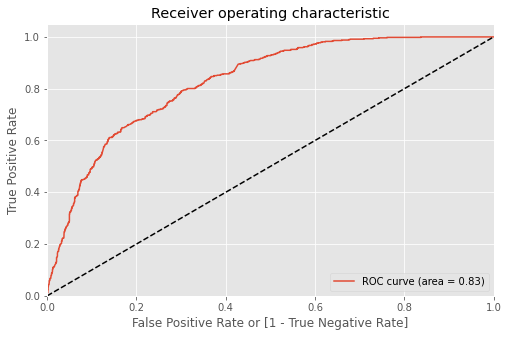

In [184]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Churn, y_test_pred_final.Churn_prob, drop_intermediate = False )
draw_roc(y_test_pred_final.Churn,y_test_pred_final.Churn_prob)

## Insigts:

- From the above model it can be seen that the model performs decently and predicts the customers as expected.

- Specificity is 74.8% and Sensitivity is 71.9% which is a good balance between the trade off points.

- Obtained AUC is 0.83.